In [ ]:
import numpy as np
import panas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer

In [ ]:
people = pd.read_csv('C:/Users/tjoeun/Desktop/지하철_개인/유동인구/people2.csv')
train = pd.read_csv('C:/Users/tjoeun/Desktop/지하철_개인/지하철/train_grouped.csv')
job = pd.read_csv('job_train2.csv')

In [ ]:
people.columns

Index(['연도', '분기', '행정동코드', '총생활인구수', '남자총생활인구수', '여자총생활인구수', '남자10대이하',
       '남자10대', '남자20대', '남자30대', '남자40대', '남자50대', '남자60대', '남자70대이상',
       '여자10대이하', '여자10대', '여자20대', '여자30대', '여자40대', '여자50대', '여자60대',
       '여자70대이상', '역명2', '구', '행정동_카카오', '위도', '경도'],
      dtype='object')

In [ ]:
people_grouped = people.groupby(['연도', '분기','구','역명2'])[['총생활인구수', '남자총생활인구수', '여자총생활인구수', '남자10대이하',
       '남자10대', '남자20대', '남자30대', '남자40대', '남자50대', '남자60대', '남자70대이상',
       '여자10대이하', '여자10대', '여자20대', '여자30대', '여자40대', '여자50대', '여자60대',
       '여자70대이상']].mean().round(0).astype(int).reset_index()
people_grouped

,연도,분기,구,역명2,위도,경도,총생활인구수,남자총생활인구수,여자총생활인구수,남자10대이하,...,남자60대,남자70대이상,여자10대이하,여자10대,여자20대,여자30대,여자40대,여자50대,여자60대,여자70대이상
0,2018.0,1,강남구,2호선 강남역,37.497958,127.027539,115610,60036,55574,911,...,3876,2829,863,2734,17721,13784,6997,5337,4349,3790
1,2018.0,1,강남구,2호선 삼성역,37.508827,127.063203,48444,24461,23984,576,...,1904,1369,762,1241,5626,5771,3839,2699,2238,1808
2,2018.0,1,강남구,2호선 선릉역,37.504257,127.048174,39944,19479,20465,953,...,1455,1362,906,1193,3591,4492,3485,2352,2194,2251
3,2018.0,1,강남구,2호선 역삼역,37.500658,127.036430,45573,21673,23901,1162,...,1705,1438,1098,2230,3866,4620,4793,2581,2383,2330
4,2018.0,1,강남구,3호선 대청역,37.493607,127.079526,17415,8370,9045,523,...,1068,872,476,572,1051,1378,1408,1522,1340,1298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,2024.0,1,중랑구,7호선 면목역,37.588700,127.087400,19149,9056,10093,647,...,1108,957,600,653,1255,1478,1456,1724,1375,1552
6837,2024.0,1,중랑구,7호선 상봉역,37.595400,127.085700,21454,10079,11375,656,...,1180,889,532,622,1943,2099,1568,1774,1423,1414
6838,2024.0,1,중랑구,7호선 중화역,37.602604,127.079254,20467,9911,10556,868,...,1298,1110,696,679,1305,1490,1455,1738,1588,1605
6839,2024.0,1,중랑구,중앙선 망우역,37.599300,127.092100,25171,11720,13451,895,...,1548,1272,866,949,1567,2105,2004,2180,1826,1953


In [ ]:
people_grouped.to_csv('people_grouped.csv',index=False)

In [ ]:
train

,년도,분기,구,역명2,승차총승객수,하차총승객수,총승객수
0,2018,1,강남구,2호선 강남역,104517,105054,209571
1,2018,1,강남구,2호선 삼성역,56829,57955,114784
2,2018,1,강남구,2호선 선릉역,54000,46244,100243
3,2018,1,강남구,2호선 역삼역,46641,50979,97620
4,2018,1,강남구,3호선 대청역,9627,8652,18279
...,...,...,...,...,...,...,...
7483,2024,1,중랑구,7호선 용마산역,5489,5400,10890
7484,2024,1,중랑구,7호선 중화역,9975,9732,19707
7485,2024,1,중랑구,중앙선 망우역,7270,7071,14341
7486,2024,1,중랑구,중앙선 상봉역,5538,5439,10977


In [ ]:
job.head()

,년도,분기,행정동코드,행정동명,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,...,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수,역명2,구,행정동_카카오,위도,경도
0,2019,1,11110600,가회동,22078,18464,3614,36,2844,8418,...,1077,1343,687,337,151,3호선 안국역,종로구,"종로1,2,3,4가동",37.576562,126.985470
1,2019,1,11110560,평창동,2458,1110,1348,6,340,515,...,235,280,264,344,223,6호선 화랑대역,노원구,공릉2동,37.619875,127.084106
2,2019,1,11110650,혜화동,5330,2736,2594,20,907,1322,...,564,731,622,458,207,4호선 혜화역,종로구,혜화동,37.582116,127.001759
3,2019,1,11110650,혜화동,5330,2736,2594,20,907,1322,...,564,731,622,458,207,7호선 수락산역,노원구,상계1동,37.677804,127.055314
4,2019,1,11140650,신당5동,2047,908,1139,6,288,511,...,184,273,256,276,147,2호선 신당역,중구,신당동,37.565681,127.019488


In [ ]:
job.columns

Index(['년도', '분기', '행정동코드', '행정동명', '총직장인구수', '남성직장인구수', '여성직장인구_수',
       '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수', '역명2', '구', '행정동_카카오', '위도',
       '경도'],
      dtype='object')

In [ ]:
job_grouped = job.groupby(['년도','분기','구','역명2'])[['총직장인구수', '남성직장인구수', '여성직장인구_수',
       '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수']].mean().round(0).astype(int).reset_index()
job_grouped

,년도,분기,구,역명2,총직장인구수,남성직장인구수,여성직장인구_수,10대직장인구수,20대직장인구수,30대직장인구수,...,남성30대직장인구수,남성40대직장인구수,남성50대직장인구수,남성60대이상직장인구수,여성10대직장인구수,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수
0,2019,1,강남구,2호선 강남역,192833,108670,84163,1001,43095,60549,...,35847,30675,16304,8330,611,25971,24702,14681,11863,6335
1,2019,1,강남구,2호선 삼성역,95170,56571,38599,393,22596,31912,...,19363,14979,7704,4684,230,12918,12549,6059,4151,2692
2,2019,1,강남구,2호선 선릉역,57050,27748,29302,240,16034,17414,...,9453,6341,3549,2302,140,10031,7961,5422,4205,1543
3,2019,1,강남구,2호선 역삼역,50568,27234,23334,313,12803,14364,...,8159,6949,4323,2464,186,7591,6205,4270,3321,1761
4,2019,1,강남구,3호선 대청역,8644,6228,2416,48,2188,2294,...,1892,1180,928,477,13,472,402,494,614,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5225,2023,3,중랑구,7호선 먹골역,2333,1314,1019,2,292,554,...,311,332,346,188,2,156,243,286,246,87
5226,2023,3,중랑구,7호선 면목역,1805,1097,708,3,188,330,...,176,255,338,254,2,116,154,197,165,74
5227,2023,3,중랑구,7호선 상봉역,3914,2694,1220,16,467,908,...,616,731,664,390,4,186,292,403,266,68
5228,2023,3,중랑구,7호선 중화역,1744,951,792,4,206,329,...,142,218,227,272,1,118,187,223,175,88


In [ ]:
from functools import reduce # 세 개의 파일을 한 번에 합칠때

df = reduce(lambda x, y :pd.merge(x,y,on='역명2',how='inner'),[train,people_grouped,job_grouped])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2563412 entries, 0 to 2563411
Data columns (total 55 columns):
 #   Column        Dtype  
---  ------        -----  
 0   년도_x          int64  
 1   분기_x          int64  
 2   구_x           object 
 3   역명2           object 
 4   승차총승객수        int64  
 5   하차총승객수        int64  
 6   총승객수          int64  
 7   연도            object 
 8   분기_y          int64  
 9   구_y           object 
 10  위도            float64
 11  경도            float64
 12  총생활인구수        int32  
 13  남자총생활인구수      int32  
 14  여자총생활인구수      int32  
 15  남자10대이하       int32  
 16  남자10대         int32  
 17  남자20대         int32  
 18  남자30대         int32  
 19  남자40대         int32  
 20  남자50대         int32  
 21  남자60대         int32  
 22  남자70대이상       int32  
 23  여자10대이하       int32  
 24  여자10대         int32  
 25  여자20대         int32  
 26  여자30대         int32  
 27  여자40대         int32  
 28  여자50대         int32  
 29  여자60대         int32  
 30  여자70대이상       int3

In [ ]:
df.head()

,년도_x,분기_x,구_x,역명2,승차총승객수,하차총승객수,총승객수,연도,분기_y,구_y,...,남성30대직장인구수,남성40대직장인구수,남성50대직장인구수,남성60대이상직장인구수,여성10대직장인구수,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수
0,2018,1,강남구,2호선 강남역,104517,105054,209571,2018.0,1,강남구,...,35847,30675,16304,8330,611,25971,24702,14681,11863,6335
1,2018,1,강남구,2호선 강남역,104517,105054,209571,2018.0,1,강남구,...,35821,30867,17178,7659,199,16359,20619,16241,16479,5473
2,2018,1,강남구,2호선 강남역,104517,105054,209571,2018.0,1,강남구,...,35821,30867,17178,7659,199,16359,20619,16241,16479,5473
3,2018,1,강남구,2호선 강남역,104517,105054,209571,2018.0,1,강남구,...,32429,28719,16126,7112,305,17969,19532,15278,13666,3026
4,2018,1,강남구,2호선 강남역,104517,105054,209571,2018.0,1,강남구,...,32429,28719,16126,7112,305,17969,19532,15278,13666,3026


In [ ]:
df.columns

Index(['년도_x', '분기_x', '구_x', '역명2', '승차총승객수', '하차총승객수', '총승객수', '연도', '분기_y',
       '구_y', '위도', '경도', '총생활인구수', '남자총생활인구수', '여자총생활인구수', '남자10대이하', '남자10대',
       '남자20대', '남자30대', '남자40대', '남자50대', '남자60대', '남자70대이상', '여자10대이하',
       '여자10대', '여자20대', '여자30대', '여자40대', '여자50대', '여자60대', '여자70대이상', '년도_y',
       '분기', '구', '총직장인구수', '남성직장인구수', '여성직장인구_수', '10대직장인구수', '20대직장인구수',
       '30대직장인구수', '40대직장인구수', '50대직장인구수', '60대이상직장인구수', '남성10대직장인구수',
       '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수', '남성50대직장인구수', '남성60대이상직장인구수',
       '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수', '여성40대직장인구수', '여성50대직장인구수',
       '여성60대이상직장인구수'],
      dtype='object')

In [ ]:
df2= df[['년도_x','분기_x','구_x','역명2','승차총승객수', '하차총승객수', '총승객수','총생활인구수',
       '남자총생활인구수', '여자총생활인구수', '남자10대이하', '남자10대', '남자20대', '남자30대', '남자40대',
       '남자50대', '남자60대', '남자70대이상', '여자10대이하', '여자10대', '여자20대', '여자30대',
       '여자40대', '여자50대', '여자60대', '여자70대이상', '총직장인구수', '남성직장인구수',
       '여성직장인구_수', '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수']]

In [ ]:
df2.columns=['년도','분기','구','역명2','승차평균승객수', '하차평균승객수', '평균승객수','평균생활인구수',
       '남자평균생활인구수', '여자평균생활인구수', '남자10대이하', '남자10대', '남자20대', '남자30대', '남자40대',
       '남자50대', '남자60대', '남자70대이상', '여자10대이하', '여자10대', '여자20대', '여자30대',
       '여자40대', '여자50대', '여자60대', '여자70대이상', '평균직장인구수', '남성평균직장인구수',
       '여성평균직장인구수', '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수']

In [ ]:
df2.head()

,년도,분기,구,역명2,승차평균승객수,하차평균승객수,평균승객수,평균생활인구수,남자평균생활인구수,여자평균생활인구수,...,남성30대직장인구수,남성40대직장인구수,남성50대직장인구수,남성60대이상직장인구수,여성10대직장인구수,여성20대직장인구수,여성30대직장인구수,여성40대직장인구수,여성50대직장인구수,여성60대이상직장인구수
0,2018,1,강남구,2호선 강남역,104517,105054,209571,115610,60036,55574,...,35847,30675,16304,8330,611,25971,24702,14681,11863,6335
1,2018,1,강남구,2호선 강남역,104517,105054,209571,115610,60036,55574,...,35821,30867,17178,7659,199,16359,20619,16241,16479,5473
2,2018,1,강남구,2호선 강남역,104517,105054,209571,115610,60036,55574,...,35821,30867,17178,7659,199,16359,20619,16241,16479,5473
3,2018,1,강남구,2호선 강남역,104517,105054,209571,115610,60036,55574,...,32429,28719,16126,7112,305,17969,19532,15278,13666,3026
4,2018,1,강남구,2호선 강남역,104517,105054,209571,115610,60036,55574,...,32429,28719,16126,7112,305,17969,19532,15278,13666,3026


In [ ]:
lr = LinearRegression()

X = df2.drop(['년도','분기','구','역명2','평균승객수'],axis=1)
Y = df2['평균승객수']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=10)

norm = Normalizer() #정규화
X_train_scaled = norm.fit_transform(X_train)
X_test_scaled = norm.transform(X_test)

lr.fit(X_train_scaled,y_train)
r_square = lr.score(X_test_scaled, y_test)
print("결정계수",r_square)
print("회귀식의 기울기 (a)", lr.coef_)
print("회귀식의 y절편 (b)", lr.intercept_)


결정계수 0.6605787160312269
회귀식의 기울기 (a) [ 3.72221890e+04  2.98224866e+04  1.95900955e+07 -2.03149523e+07
 -5.90932969e+06  9.57637223e+05  6.34553825e+05  4.30061317e+05
  8.27880656e+05  1.76627760e+06 -7.52147301e+05  3.11937167e+05
  1.26124172e+06 -1.39125901e+07 -1.38270084e+07 -1.33856125e+07
 -1.42219861e+07 -1.38584292e+07 -1.34896159e+07 -1.36181432e+07
 -1.41276573e+07  3.33312527e+07 -3.07252318e+07 -2.12118008e+07
 -3.62632078e+07  2.83879145e+07 -7.69026134e+06  5.57392071e+07
  1.34023387e+08 -3.46505351e+06  2.71089701e+07 -3.05646829e+07
  4.97301690e+06 -5.84211815e+07 -1.36607124e+08  1.11126741e+06
  2.77349914e+07 -4.08343169e+07 -4.25147630e+06 -6.80204454e+07
 -1.45968224e+08 -9.21036575e+06]
회귀식의 y절편 (b) 64119.810652679625
모델의 정확도:  0.6605787160312269


In [ ]:
X.columns

Index(['승차평균승객수', '하차평균승객수', '평균생활인구수', '남자평균생활인구수', '여자평균생활인구수', '남자10대이하',
       '남자10대', '남자20대', '남자30대', '남자40대', '남자50대', '남자60대', '남자70대이상',
       '여자10대이하', '여자10대', '여자20대', '여자30대', '여자40대', '여자50대', '여자60대',
       '여자70대이상', '평균직장인구수', '남성평균직장인구수', '여성평균직장인구수', '10대직장인구수', '20대직장인구수',
       '30대직장인구수', '40대직장인구수', '50대직장인구수', '60대이상직장인구수', '남성10대직장인구수',
       '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수', '남성50대직장인구수', '남성60대이상직장인구수',
       '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수', '여성40대직장인구수', '여성50대직장인구수',
       '여성60대이상직장인구수'],
      dtype='object')

In [ ]:
pd.DataFrame([lr.coef_],columns=X.columns).T #계수

,0
승차평균승객수,3.722219e+04
하차평균승객수,2.982249e+04
평균생활인구수,1.959010e+07
남자평균생활인구수,-2.031495e+07
여자평균생활인구수,-5.909330e+06
남자10대이하,9.576372e+05
남자10대,6.345538e+05
남자20대,4.300613e+05
남자30대,8.278807e+05
남자40대,1.766278e+06


In [ ]:
import pandas as pd
import folium
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['axes.unicode_minus'] = False # 그래프 마이너스 기호 깨질때
plt.rcParams['font.family'] ='Malgun Gothic' # 그래프 한글깨질때

In [ ]:
df2.columns

Index(['년도', '분기', '구', '역명2', '승차평균승객수', '하차평균승객수', '평균승객수', '평균생활인구수',
       '남자평균생활인구수', '여자평균생활인구수', '남자10대이하', '남자10대', '남자20대', '남자30대', '남자40대',
       '남자50대', '남자60대', '남자70대이상', '여자10대이하', '여자10대', '여자20대', '여자30대',
       '여자40대', '여자50대', '여자60대', '여자70대이상', '평균직장인구수', '남성평균직장인구수',
       '여성평균직장인구수', '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수'],
      dtype='object')

In [ ]:
data = df2[[ '승차평균승객수', '하차평균승객수', '평균승객수', '평균생활인구수',
       '남자평균생활인구수', '여자평균생활인구수', '남자10대이하', '남자10대', '남자20대', '남자30대', '남자40대',
       '남자50대', '남자60대', '남자70대이상', '여자10대이하', '여자10대', '여자20대', '여자30대',
       '여자40대', '여자50대', '여자60대', '여자70대이상', '평균직장인구수', '남성평균직장인구수',
       '여성평균직장인구수', '10대직장인구수', '20대직장인구수', '30대직장인구수', '40대직장인구수', '50대직장인구수',
       '60대이상직장인구수', '남성10대직장인구수', '남성20대직장인구수', '남성30대직장인구수', '남성40대직장인구수',
       '남성50대직장인구수', '남성60대이상직장인구수', '여성10대직장인구수', '여성20대직장인구수', '여성30대직장인구수',
       '여성40대직장인구수', '여성50대직장인구수', '여성60대이상직장인구수']]

<Axes: >

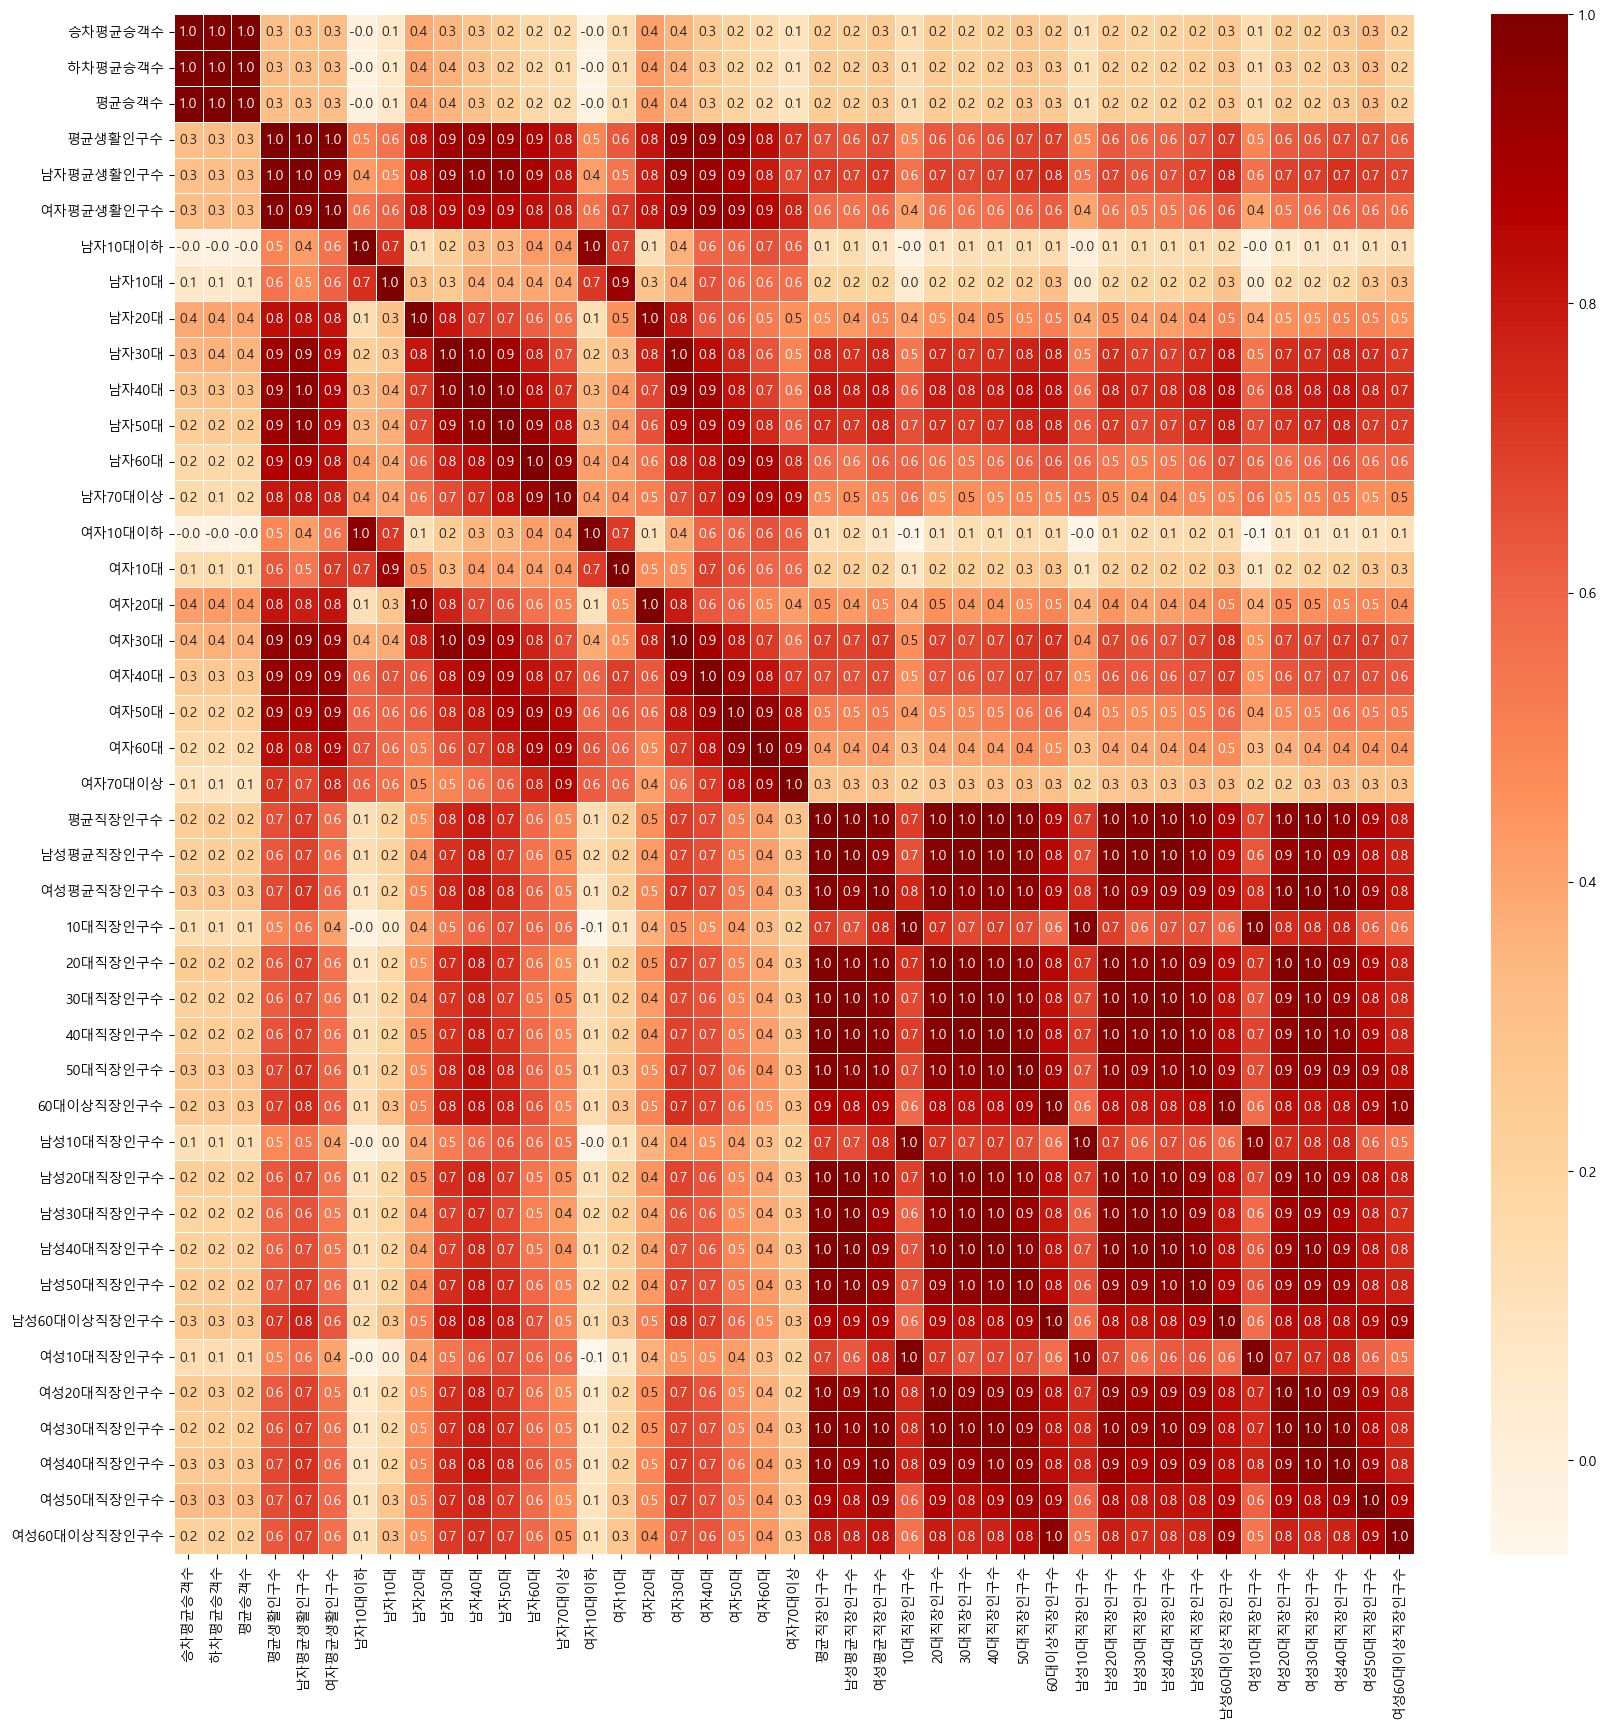

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data = data.corr(), annot=True,
fmt = '.1f', linewidths=.5, cmap='OrRd') # 상관계수 히트맵